In [2]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

import sys
import os
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import time

from sklearn.model_selection import train_test_split, KFold, GroupKFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import f1_score, accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, LSTM
from keras.regularizers import l1, l2, l1_l2
from keras.models import load_model


module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.transformers import LinearTransformation, ParabolicTransformation, TrigTransformation
from src.preprocessing import *
from src.sliding_window import *
from src.models import *

%matplotlib inline
%load_ext autoreload
%autoreload 2


# Global Var
sliding_window_size = 20

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
full_data = pd.read_csv('../../data/train.csv')
test_data = pd.read_csv('../../data/test.csv')

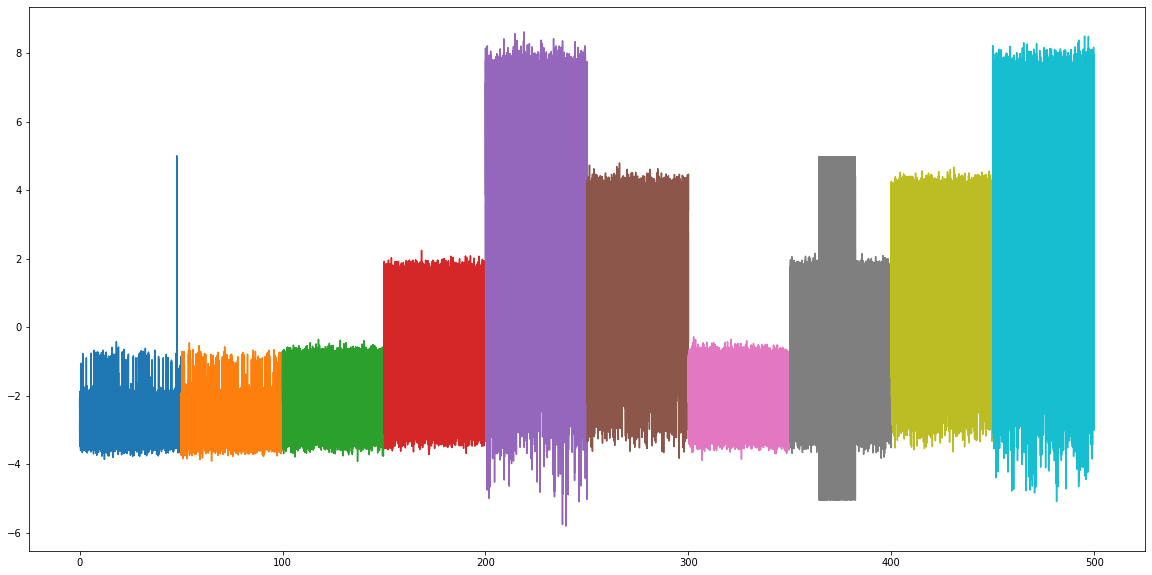

In [4]:
train_chunks = chunk_data(full_data, 10)

lt = LinearTransformation()
pt = ParabolicTransformation()
tt = TrigTransformation(trig_function = 'sin')

train_chunks[1].loc[train_chunks[1].index[:100000], 'signal'] = lt.fit_transform(train_chunks[1][:100000], 3/10, -15)
train_chunks[6]['signal'] = tt.fit_transform(train_chunks[6], 300, 50, 4.95)
train_chunks[7]['signal'] = tt.fit_transform(train_chunks[7], 350, 50, 5.030)
train_chunks[8]['signal'] = tt.fit_transform(train_chunks[8], 400, 50, 4.974)
train_chunks[9]['signal'] = tt.fit_transform(train_chunks[9], 450, 50, 5.089)

plt.figure(figsize = (20, 10))
for i in train_chunks:
    plt.plot(i['time'], i['signal'])

In [5]:
# plt.figure(figsize = (20, 10))
# for chunk in train_chunks:
#     a = chunk

#     wind = 1000

#     b = a.rolling(wind).min()
#     b['signal'] = b['signal'].mean()


#     c = a.rolling(wind).max()
#     c['signal'] = c['signal'].mean()

#     print(b['signal'].mean(), c['signal'].mean())
#     plt.plot(a['time'], a['signal'])
#     plt.plot(b['time'], b['signal'], linewidth = 3)
#     plt.plot(c['time'], c['signal'], linewidth = 3)






# plt.figure(figsize = (20, 10))
# for chunk in test_chunks:
#     a = chunk

#     wind = 1000

#     b = a.rolling(wind).min()
#     b['signal'] = b['signal'].mean()


#     c = a.rolling(wind).max()
#     c['signal'] = c['signal'].mean()

    
#     plt.plot(a['time'], a['signal'])
#     plt.plot(b['time'], b['signal'], linewidth = 3)
#     plt.plot(c['time'], c['signal'], linewidth = 3)
    


In [6]:
'''
class MinMaxTransformer():
    def __init__(self):
        pass
    
    
    def fit(self, training_data):
        self.training_data = training_data
        return self
    
    
    def transform(self, data):
        array = np.array(data)
        x = array[:, 0]
        y = array[:, 1]
        return y - (self.slope * x + self.intercept)
    
    
    def fit_transform(self, training_data, data):
        self.fit(training_data)
        return self.transform(data)
#''';

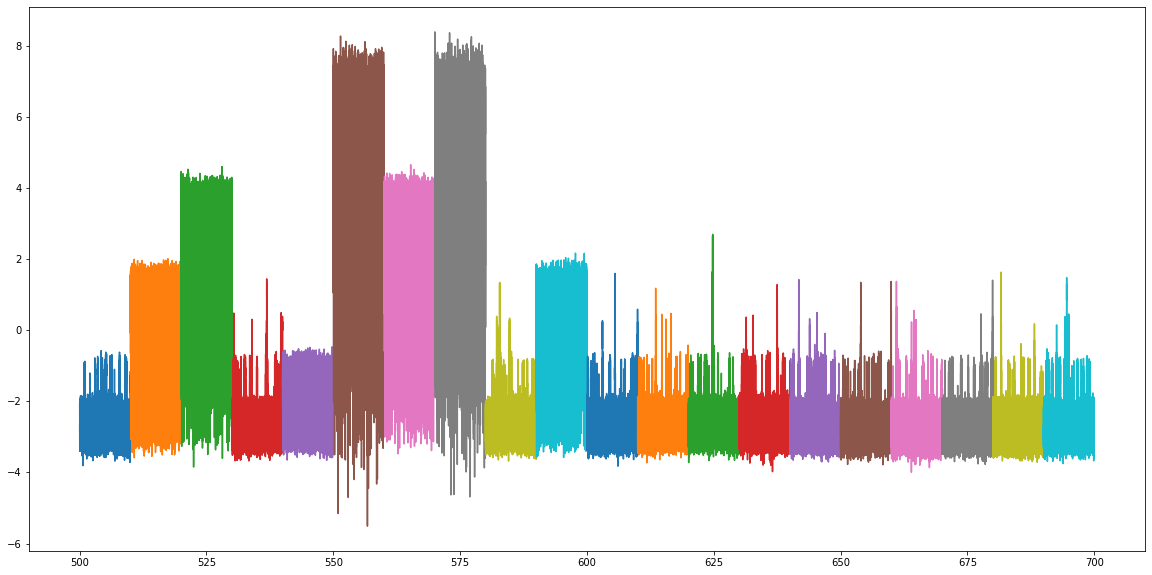

In [5]:
test_chunks = chunk_data(test_data, 4)
test_chunks = chunk_data(test_chunks[0], 5) + chunk_data(test_chunks[1], 5) + test_chunks[2:]

test_chunks[0]['signal'] = lt.fit_transform(test_chunks[0], 3 / 10, -150)
test_chunks[1]['signal'] = lt.fit_transform(test_chunks[1], 3 / 10, -153)
test_chunks[4]['signal'] = lt.fit_transform(test_chunks[4], 3 / 10, -162)
test_chunks[6]['signal'] = lt.fit_transform(test_chunks[6], 3 / 10, -168)
test_chunks[7]['signal'] = lt.fit_transform(test_chunks[7], 3 / 10, -171)
test_chunks[8]['signal'] = lt.fit_transform(test_chunks[8], 3 / 10, -174)
test_chunks[10]['signal'] = tt.fit_transform(test_chunks[10], 600, 50, 4.925)

test_chunks = test_chunks[:10] + chunk_data(pd.concat(test_chunks[10:]), 10)

plt.figure(figsize = (20, 10))
for i in test_chunks:
    plt.plot(i['time'], i['signal'])

In [6]:
# model5_train = train_chunks[4]
# model5_train = make_sliding_window_frame(model5_train, sliding_window_size)

# model5_test = train_chunks[9]
# model5_test = make_sliding_window_frame(model5_test, sliding_window_size)

# nn = BasicNN(sliding_window_size)
# model5 = nn.get_trained_model(model5_train, cycles = 20, epochs = 2)

In [7]:
# f1_score(model5_test['open_channels'], model5.predict_classes(model5_test.drop(['open_channels'], axis = 1) + 0.06), average = 'macro')

In [8]:
model1_data = pd.concat([train_chunks[0], train_chunks[1]])
model1_data = make_sliding_window_frame(model1_data, sliding_window_size)

model2_data = pd.concat([train_chunks[2], train_chunks[6]])
model2_data = make_sliding_window_frame(model2_data, sliding_window_size)

model3_data = pd.concat([train_chunks[3]])
# model3_data = pd.concat([train_chunks[3], train_chunks[7]])
model3_data = make_sliding_window_frame(model3_data, sliding_window_size)

model4_data = pd.concat([train_chunks[5], train_chunks[8]])
model4_data = make_sliding_window_frame(model4_data, sliding_window_size)

model5_data = pd.concat([train_chunks[4], train_chunks[9]])
model5_data = make_sliding_window_frame(model5_data, sliding_window_size)

In [9]:
# nn = BasicNN(sliding_window_size)
# model1 = nn.get_trained_model(model1_data, cycles = 8, epochs = 2)
# print('\n\n')
# time.sleep(300)
# model2 = nn.get_trained_model(model2_data, cycles = 8, epochs = 2)
# print('\n\n')
# time.sleep(300)
# model3 = nn.get_trained_model(model3_data, cycles = 10, epochs = 2)
# print('\n\n')
# time.sleep(300)
# model4 = nn.get_trained_model(model4_data, cycles = 15, epochs = 2)
# print('\n\n')
# time.sleep(300)
# model5 = nn.get_trained_model(model5_data, cycles = 20, epochs = 2)

model1 = load_model('../../data/models/NN_model1.h5')
model2 = load_model('../../data/models/NN_model2.h5')
model3 = load_model('../../data/models/NN_model3.h5')
model4 = load_model('../../data/models/NN_model4.h5')
model5 = load_model('../../data/models/NN_model5.h5')

In [10]:
model1_layer0 = model1
model2_layer0 = model2
model3_layer0 = model3
model4_layer0 = model4
model5_layer0 = model5

model1_layer1 = load_model('NN_model1_layer_1.h5')
model2_layer1 = load_model('NN_model2_layer_1.h5')
model3_layer1 = load_model('NN_model3_layer_1.h5')
model4_layer1 = load_model('NN_model4_layer_1.h5')
model5_layer1 = load_model('NN_model5_layer_1.h5')

In [11]:
def get_next_input_space(model, data):
    next_input_space = model.predict_classes(data.drop(['open_channels'], axis = 1))
    next_input_space = pd.Series(next_input_space, name = '')
    next_input_space = make_sliding_window_series(next_input_space, sliding_window_size)
    next_input_space = pd.concat([next_input_space, data], axis = 1, ignore_index = True)
    next_input_space = next_input_space.rename(columns = {40 : 'open_channels'})
    return next_input_space

In [12]:
#model1_input_space_1 = get_next_input_space(model1_layer0, model1_data)
#model2_input_space_1 = get_next_input_space(model2_layer0, model2_data)
#model3_input_space_1 = get_next_input_space(model3_layer0, model3_data)
#model4_input_space_1 = get_next_input_space(model4_layer0, model4_data)
#model5_input_space_1 = get_next_input_space(model5_layer0, model5_data)

In [13]:
nn = BasicNN(40)

In [14]:
# model1_layer1 = nn.get_trained_model(model1_input_space_1, cycles = 8, epochs = 2)
# model1_layer1.save('NN_model1_layer_1.h5')

In [15]:
# model2_layer1 = nn.get_trained_model(model2_input_space_1, cycles = 5, epochs = 2)
# model2_layer1.save('NN_model2_layer_1.h5')

In [16]:
#model3_layer1 = nn.get_trained_model(model3_input_space_1, cycles = 5, epochs = 2)
#model3_layer1.save('NN_model3_layer_1.h5')

In [17]:
# model4_layer1 = nn.get_trained_model(model4_input_space_1, cycles = 5, epochs = 2)
# model4_layer1.save('NN_model4_layer_1.h5')

In [18]:
# model5_layer1 = nn.get_trained_model(model5_input_space_1, cycles = 10, epochs = 2)
# model5_layer1.save('NN_model5_layer_1.h5')

In [19]:
def _predict(model, test_data):
    #y_predictions = model.predict_classes(make_sliding_window(test_data['signal'], sliding_window_size))
    y_predictions = model.predict_classes(test_data)
    #return pd.DataFrame({'time' : test_data['time'].values, 'open_channels' : y_predictions})
    return y_predictions

In [20]:
def predict(model_layer_1, model_layer_2, data_layer_0):
    first_input_space = make_sliding_window_series(data_layer_0['signal'], sliding_window_size)
    next_input_space = _predict(model_layer_1, first_input_space)
    next_input_space = pd.Series(next_input_space, name = '')
    next_input_space = make_sliding_window_series(next_input_space, sliding_window_size)
    next_input_space = pd.concat([next_input_space, first_input_space], axis = 1, ignore_index = True)
    next_input_space = next_input_space.rename(columns = {40 : 'open_channels'})
    return pd.DataFrame({'time' : data_layer_0['time'].values, 'open_channels' : _predict(model_layer_2, next_input_space)})

In [20]:
#model1.save('NN_model1.h5')
#model2.save('NN_model2.h5')
#model3.save('NN_model3.h5')
#model4.save('NN_model4.h5')
#model5.save('NN_model5.h5')

In [21]:
predictions = pd.DataFrame(columns = ['time', 'open_channels'])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[0])])
predictions = pd.concat([predictions, predict(model3_layer0, model3_layer1, test_chunks[1])])
predictions = pd.concat([predictions, predict(model4_layer0, model4_layer1, test_chunks[2])])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[3])])
predictions = pd.concat([predictions, predict(model2_layer0, model2_layer1, test_chunks[4])])
predictions = pd.concat([predictions, predict(model5_layer0, model5_layer1, test_chunks[5])])
predictions = pd.concat([predictions, predict(model4_layer0, model4_layer1, test_chunks[6])])
predictions = pd.concat([predictions, predict(model5_layer0, model5_layer1, test_chunks[7])])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[8])])
predictions = pd.concat([predictions, predict(model3_layer0, model3_layer1, test_chunks[9])])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[10])])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[11])])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[12])])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[13])])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[14])])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[15])])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[16])])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[17])])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[18])])
predictions = pd.concat([predictions, predict(model1_layer0, model1_layer1, test_chunks[19])])

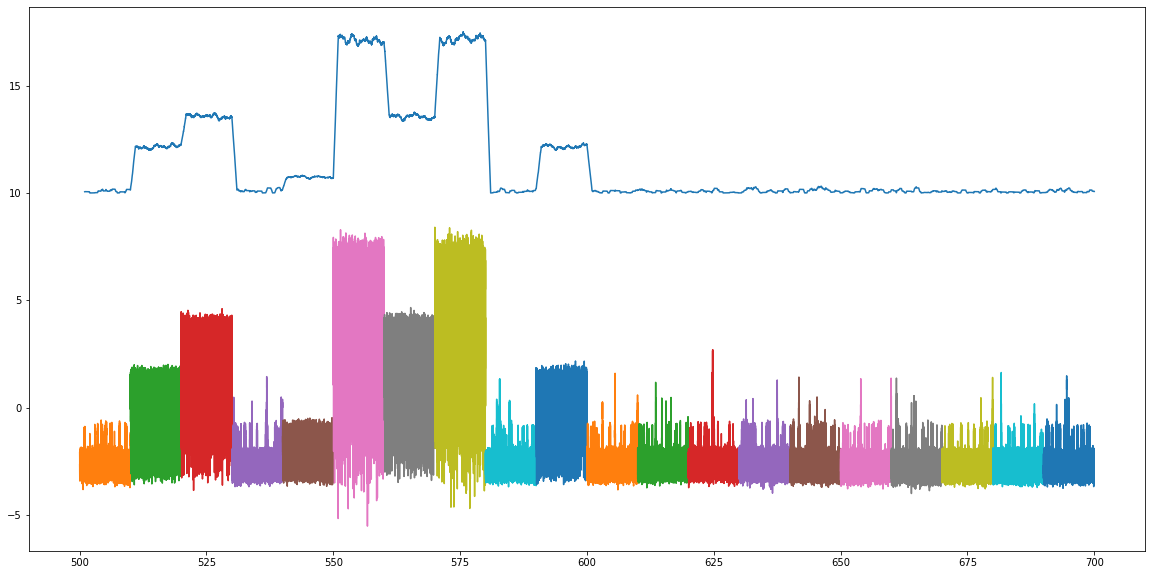

In [22]:
plt.figure(figsize = (20, 10))
plt.plot(predictions['time'], predictions['open_channels'].rolling(10000).mean() + 10)
for i in test_chunks:
    plt.plot(i['time'], i['signal'])

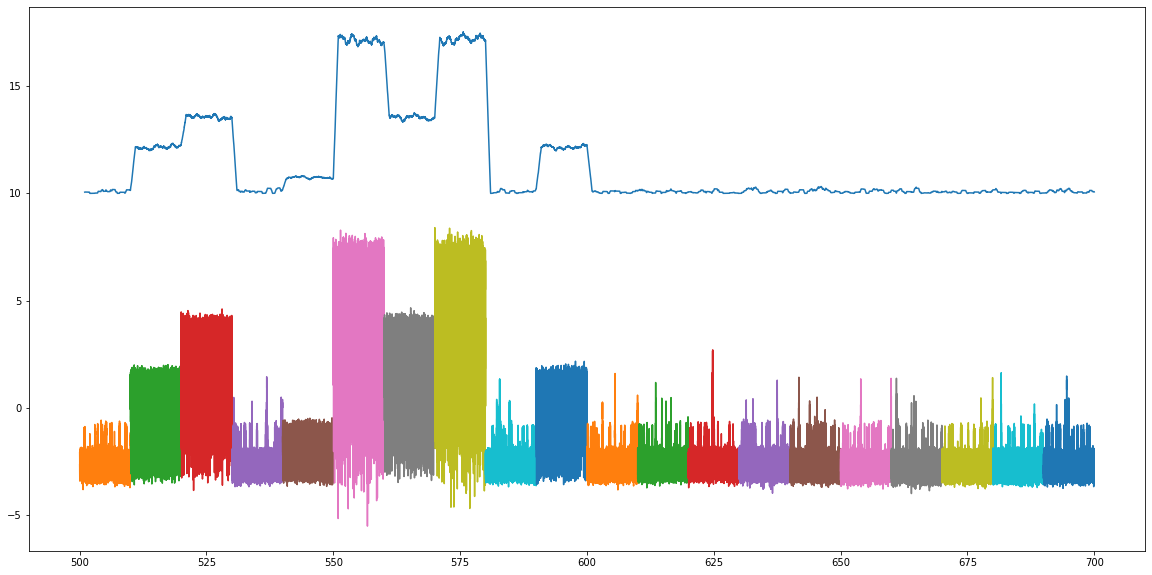

In [67]:
plt.figure(figsize = (20, 10))
plt.plot(predictions['time'], predictions['open_channels'].rolling(10000).mean() + 10)
for i in test_chunks:
    plt.plot(i['time'], i['signal'])

In [23]:
predictions.to_csv('~/Desktop/test_predictions2.csv', index = False, float_format='%.4f')
#0.937 preds_12